In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("adult.csv")

In [2]:
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
import pandas as pd

# Load the dataset (replace 'data.csv' with your dataset path)
df = pd.read_csv('adult.csv', na_values='?')

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Drop rows with NaN values
df = df.dropna()

print(df.head())


   age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States

In [5]:
# Get summary of the data
print(df.describe())


                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000   
mean      38.437902  1.897938e+05      10.121312   1092.007858     88.372489   
std       13.134665  1.056530e+05       2.549995   7406.346497    404.298370   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176272e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784250e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376285e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    30162.000000  
mean        40.931238  
std         11.979984  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [6]:
# Get data dimensions
print(df.shape)


(30162, 15)


In [7]:
# Categorize the workclass column
def unemp(job_role):
  if job_role in ["Never-worked", "Without-pay"]:
    return "Unemployed"
  else:
    return job_role

df["workclass"] = df["workclass"].apply(unemp)


In [8]:
# Combine similar work categories
def grp_emp(job_role):
  if job_role in ["Local-gov", "State-gov"]:
    return "SL-gov"
  elif job_role in ["Self-emp-inc", "Self-emp-not-inc"]:
    return "self-emp"
  else:
    return job_role

df["workclass"] = df["workclass"].apply(grp_emp)


In [9]:
# Print the distribution of the workclass categories
print(df["workclass"].value_counts())


workclass
Private        22286
self-emp        3573
SL-gov          3346
Federal-gov      943
Unemployed        14
Name: count, dtype: int64


In [10]:
# Categorize marital status
def grp_marital_sts(marital_status):
  if marital_status in ["Separated", "Divorced", "Widowed"]:
    return "Not-Married"
  elif marital_status == "Never-married":
    return marital_status
  else:
    return "Married"

df["marital.status"] = df["marital.status"].apply(grp_marital_sts)

# Print the distribution of the marital status categories
print(df["marital.status"].value_counts())


marital.status
Married          14456
Never-married     9726
Not-Married       5980
Name: count, dtype: int64


In [11]:
# Categorize native country
asia = ["China", "Hong", "India", "Iran", "Cambodia", "Japan", 
        "Laos", "Philippines", "Vietnam", "Taiwan", "Thailand"]

north_america = ["Canada", "United-States", "Puerto-Rico"]

europe = ["England", "France", "Germany", "Greece", "Holand-Netherlands", 
          "Hungary", "Ireland", "Italy", "Poland", "Portugal", "Scotland",
          "Yugoslavia"]

south_america = ["Columbia", "Cuba", "Dominican-Republic", "Ecuador", 
                 "El-Salvador", "Guatemala", "Haiti", "Honduras", "Mexico", 
                 "Nicaragua", "Outlying-US", "Peru", "Jamaica", "Trinadad&Tobago"]

remaining = ["South"]

def grp_cntry(country):
  if country in asia:
      return "Asia"
  elif country in north_america:
      return "N.A"
  elif country in europe:
      return "Europe"
  elif country in south_america:
      return "S.A"
  else:
      return "Remaining"

df["native.country"] = df["native.country"].apply(grp_cntry)

# Print the distribution of the native country categories
print(df["native.country"].value_counts())



native.country
N.A          27720
S.A           1230
Asia           634
Europe         493
Remaining       85
Name: count, dtype: int64


In [12]:
# Check data types
print(df.dtypes)


age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


In [13]:
#Convert categorical columns to factor type 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["workclass"] = le.fit_transform(df["workclass"])
df["native.country"] = le.fit_transform(df["native.country"])
df["marital.status"] = le.fit_transform(df["marital.status"])
df["occupation"] = le.fit_transform(df["occupation"])
df["income"] = le.fit_transform(df["income"])

print(df.dtypes)


age                int64
workclass          int32
fnlwgt             int64
education         object
education.num      int64
marital.status     int32
occupation         int32
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country     int32
income             int32
dtype: object


In [14]:
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility (optional but recommended)
seed = 101
np.random.seed(seed)

# Split the data into training and testing sets with a 70/30 ratio for train/test
train_data, test_data = train_test_split(df, test_size=0.3, random_state=seed)

print(train_data)
print(test_data)


       age  workclass  fnlwgt     education  education.num  marital.status  \
12535   28          1  405793    Assoc-acdm             12               0   
8310    38          1  179668     Bachelors             13               0   
17898   57          1  157974       HS-grad              9               1   
22711   39          1  347434           9th              5               0   
5766    30          0  188569           9th              5               0   
...    ...        ...     ...           ...            ...             ...   
6113    36          1  393673    Assoc-acdm             12               0   
8646    33          1  205649    Assoc-acdm             12               0   
19134   28          1  185127  Some-college             10               1   
19332   44          1  215468     Bachelors             13               2   
14188   25          1  247006    Assoc-acdm             12               0   

       occupation   relationship   race     sex  capital.gain  

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression


# Extract features (X) and target (y)
X = train_data.drop(["sex", "education", "race","relationship"], axis=1)  # Drop multiple columns
y = train_data["income"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the logistic regression model
logisticRegr = LogisticRegression(max_iter=1000)

# Perform cross-validation with 5-fold
scores = cross_validate(logisticRegr, X_train, y_train, cv=5)
print(scores)

{'fit_time': array([0.31323147, 0.25069785, 0.25110602, 0.29808474, 0.25216436]), 'score_time': array([0.01562572, 0.        , 0.01560593, 0.        , 0.        ]), 'test_score': array([0.78890392, 0.79228687, 0.78788904, 0.79397835, 0.78815567])}


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold  # Import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load your dataset or use existing data
# Assuming train_data is your dataset containing features and target

# Extract features (X) and target (y) after dropping specified columns
X = train_data.drop(["sex", "education", "race", "relationship", "income"], axis=1)
y = train_data["income"]

# Instantiate the logistic regression model
logisticRegr = LogisticRegression(max_iter=1000)

# Define the cross-validation strategy (e.g., Stratified K-Fold with 5 folds)
# Stratified K-Fold is recommended for classification tasks to preserve class distribution in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store true labels and predicted labels for all test folds
true_labels = []
predicted_labels = []

# Perform cross-validation and obtain predictions for each test fold
for train_idx, test_idx in cv.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
    
    # Fit the logistic regression model on the training fold
    logisticRegr.fit(X_train_fold, y_train_fold)
    
    # Predict labels on the test fold
    y_pred_fold = logisticRegr.predict(X_test_fold)
    
    # Append true labels and predicted labels for the current fold
    true_labels.extend(y_test_fold)
    predicted_labels.extend(y_pred_fold)

# Compute the confusion matrix based on all test folds
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[15324   554]
 [ 3854  1381]]


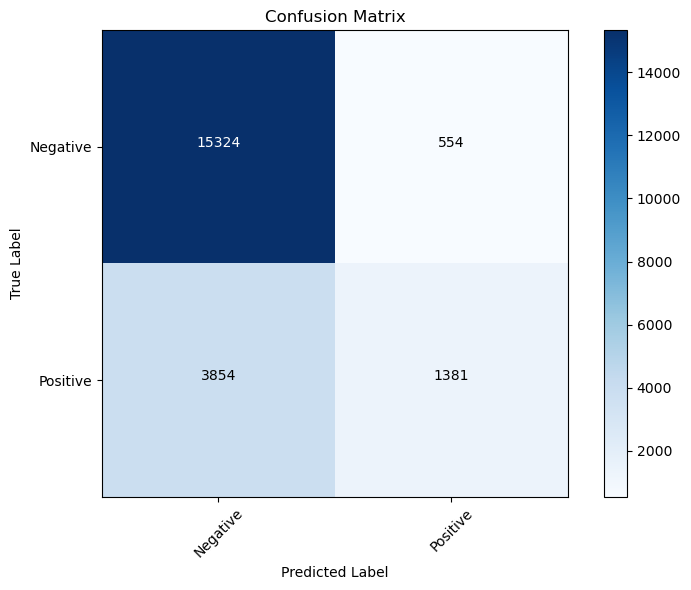

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]  # Class indices (0: Negative, 1: Positive)
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to the heatmap
thresh = cm.max() / 2.
for i, j in ((0, 0), (0, 1), (1, 0), (1, 1)):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



In [18]:
# Compute Performance Metrics
accuracy = accuracy_score(true_labels, predicted_labels)
error_rate = 1 - accuracy
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])  # TN / (TN + FP)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])  # TP / (FN + TP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Overall Error Rate: {error_rate:.4f}")
print(f"Specificity (True Negative Rate): {specificity:.4f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")


Accuracy: 0.7912
Overall Error Rate: 0.2088
Specificity (True Negative Rate): 0.9651
Sensitivity (True Positive Rate): 0.2638


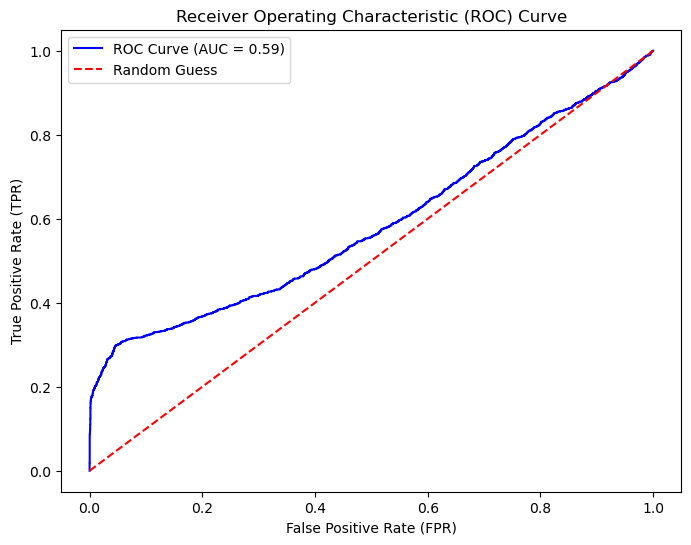

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Extract features (X) and target (y)
X = train_data.drop(["sex", "education", "race","relationship"], axis=1)  # Drop multiple columns
y = train_data["income"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the logistic regression model
logisticRegr = LogisticRegression(max_iter=5000)
logisticRegr.fit(X_train, y_train)

# Get predicted probabilities for positive class
y_scores = logisticRegr.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute ROC AUC score (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate KNN classifier (example with k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation (example with 5-fold CV)
cv_scores = cross_val_score(knn, X, y, cv=5)

# Print cross-validated accuracy scores
print("Cross-Validated Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validated Accuracy Scores: [0.77101587 0.75870234 0.75893914 0.76575083 0.76906679]
Mean CV Accuracy: 0.7646949949146096


Cross-Validated Accuracy Scores: [0.77101587 0.75870234 0.75893914 0.76575083 0.76906679]
Mean CV Accuracy: 0.7646949949146096
Accuracy on Test Set: 0.8368
Confusion Matrix (Test Set):
[[4591  198]
 [ 836  709]]


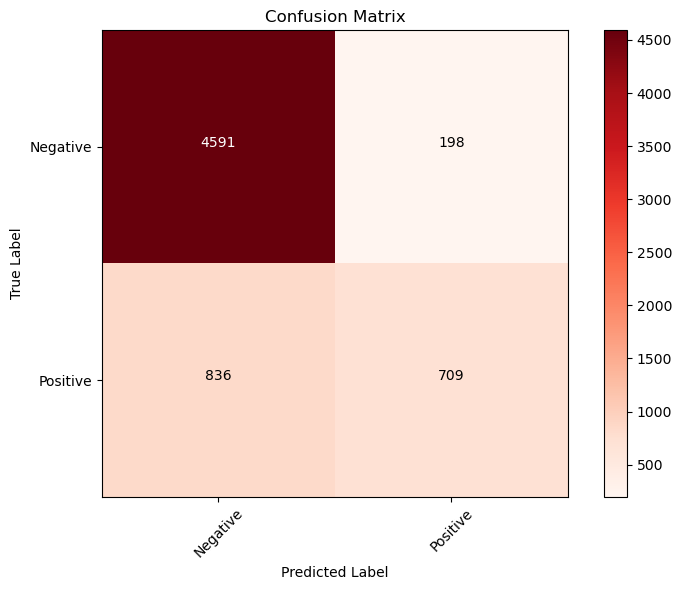

Accuracy: 0.8368
Specificity: 0.9587
Sensitivity (Recall): 0.4589
Overall Error Rate: 0.1632


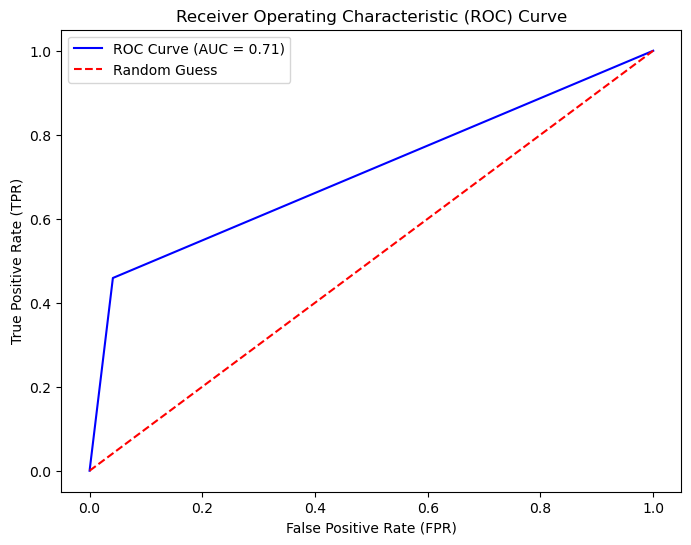

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate KNN classifier (example with k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation (example with 5-fold CV)
cv_scores = cross_val_score(knn, X, y, cv=5)

# Print cross-validated accuracy scores
print("Cross-Validated Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fit the KNN model on the entire dataset
knn.fit(X, y)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate model performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")

# Print confusion matrix and classification report for test set
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Set):")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]  # Class indices (0: Negative, 1: Positive)
plt.xticks(tick_marks, ['Negative', 'Positive'], rotation=45)
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to the heatmap
thresh = conf_matrix.max() / 2.
for i, j in ((0, 0), (0, 1), (1, 0), (1, 1)):
    plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

import numpy as np

# Assuming conf_matrix is the confusion matrix obtained from the KNN model predictions
TN = conf_matrix[0, 0]  # True Negative
FP = conf_matrix[0, 1]  # False Positive
FN = conf_matrix[1, 0]  # False Negative
TP = conf_matrix[1, 1]  # True Positive

# Calculate Accuracy
accuracy = (TP + TN) / np.sum(conf_matrix)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Overall Error Rate
error_rate = (FP + FN) / np.sum(conf_matrix)

# Print the calculated metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Overall Error Rate: {error_rate:.4f}")


# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute ROC AUC score (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()